<a href="https://colab.research.google.com/github/samnfdv/project/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Использованные библиотеки

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

In [ ]:
pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.0/140.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 37.6 MB/s eta 0:00:00


In [ ]:
import sdv
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.evaluation.single_table import evaluate_quality
from sdv.single_table import CTGANSynthesizer
from sdv.single_table import TVAESynthesizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, fbeta_score

# Просмотр данных


In [ ]:
data = pd.read_csv('/content/sample_data/original_dataset.csv')
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# удаление столбца индекс
data.drop('index', axis=1, inplace=True)

In [ ]:
# Размеры датасета
data.shape

(1000, 25)

In [ ]:
# Вывод информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [ ]:
# Замена значений столбца Level с строковых на числовые
data = data.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

<Axes: ylabel='Air Pollution'>

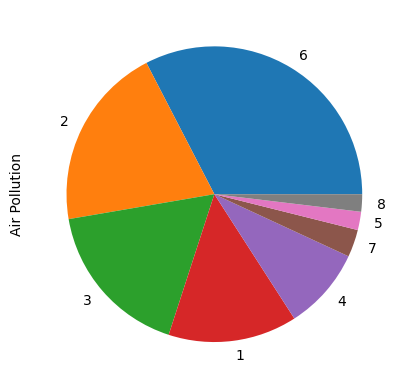

In [ ]:
# Распределние столбца Air Pollution оригинального датасета
data['Air Pollution'].value_counts().plot(kind='pie')

<Axes: title={'center': 'Count of age'}, xlabel='age', ylabel='count'>

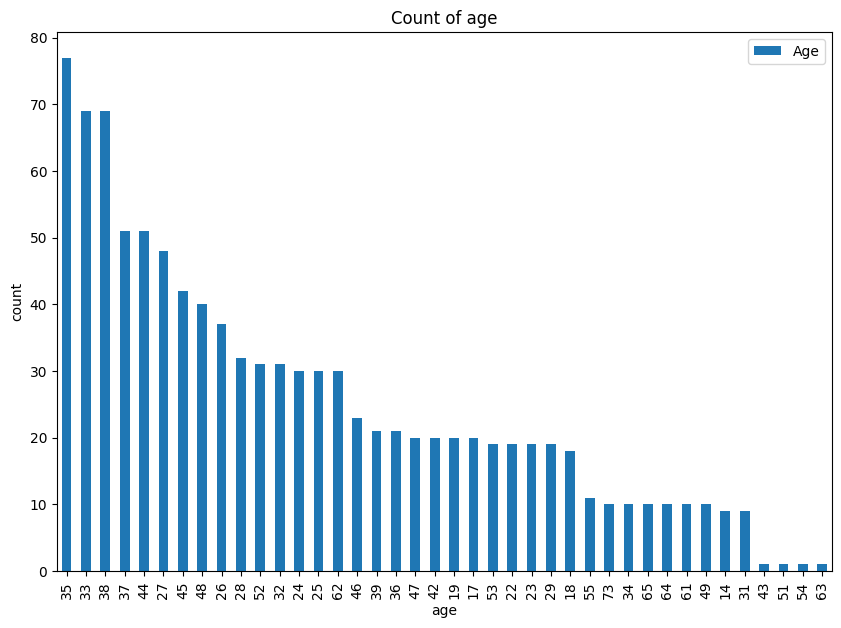

In [ ]:
# Распределение сиолбца Age оригинального датасета
data['Age'].value_counts().plot(kind='bar', title='Count of age', xlabel='age', ylabel='count', legend=True, figsize=(10,7))

<Axes: title={'center': 'Count of Air pollution'}, xlabel='степень воздействия', ylabel='Количество пациентов'>

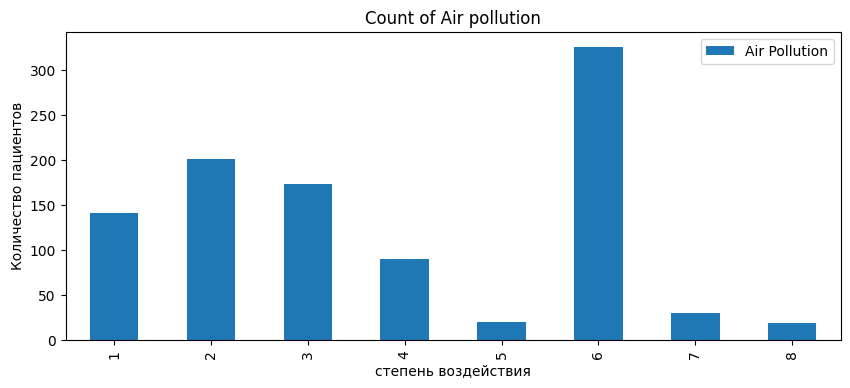

In [ ]:
# Распределение столбца Air Pollution оригинального датасета
data['Air Pollution'].value_counts().sort_index().plot(kind='bar', title='Count of Air pollution', xlabel='степень воздействия', ylabel='Количество пациентов', legend=True, figsize=(10,4))

<Axes: ylabel='Snoring'>

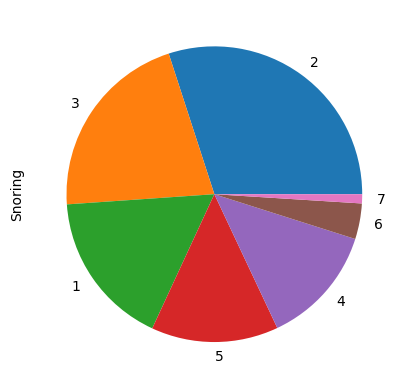

In [ ]:
# Распределение столбца Snoring оригинального набора данных
data['Snoring'].value_counts().plot(kind='pie')

<ipython-input-15-caa13a386e07>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr(), annot=True, cmap='coolwarm')


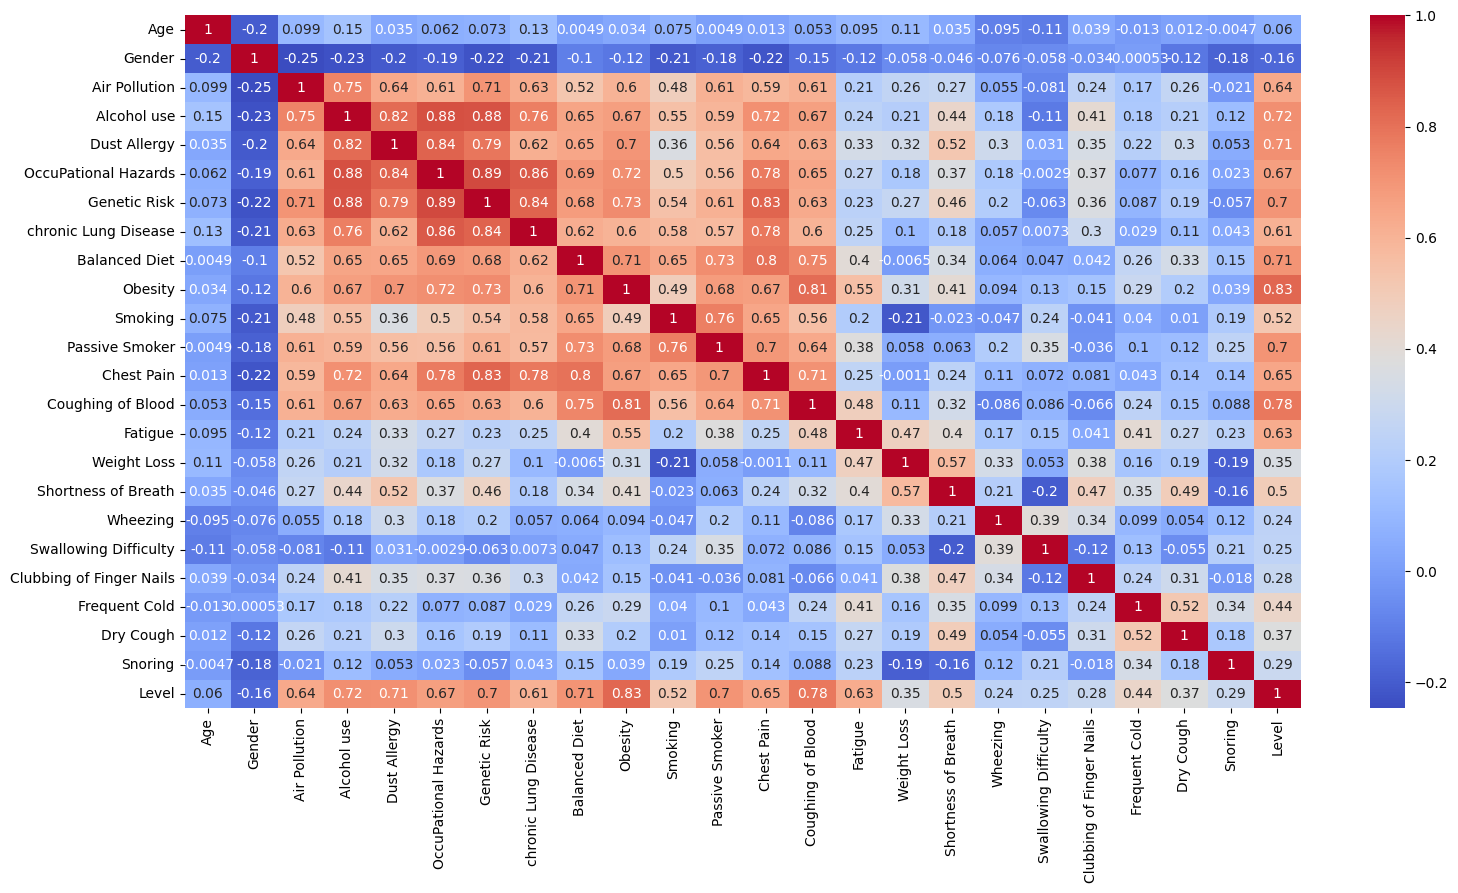

In [ ]:
# Тепловая карта оригинального набора данных
plt.figure(figsize = (18,9))
sn.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Синтезирование данных


In [ ]:
# Подготовка метаданных
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)
python_dict = metadata.to_dict()
metadata.validate()

## гаус

In [ ]:
# Создание синтезатора
synthesizer = GaussianCopulaSynthesizer(metadata)
# Обучение синтезатора
synthesizer.fit(data)
# Синтезированние данных на обученном синтезаторе
synthetic_data = synthesizer.sample(num_rows=10000)

In [ ]:
# Вывод синтезированных данных
synthetic_data

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,sdv-id-0,63,1,6,5,6,7,2,6,7,...,9,2,2,6,8,1,3,7,3,2
1,sdv-id-1,29,2,4,5,5,7,3,6,2,...,4,4,9,5,4,2,3,2,5,3
2,sdv-id-2,39,2,6,2,2,3,2,6,4,...,8,7,9,5,8,4,2,2,3,3
3,sdv-id-3,34,1,8,6,4,2,7,5,6,...,4,3,6,1,6,3,3,5,1,2
4,sdv-id-4,23,2,3,5,1,5,3,2,4,...,4,6,2,6,2,2,1,5,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sdv-id-9995,22,1,4,1,7,1,4,2,7,...,5,2,1,7,2,4,6,1,4,2
9996,sdv-id-9996,36,1,6,5,7,2,5,2,7,...,3,2,3,2,6,2,3,1,5,2
9997,sdv-id-9997,26,1,6,8,1,7,7,6,6,...,2,4,2,5,7,7,7,6,4,3
9998,sdv-id-9998,55,1,1,5,7,5,3,2,2,...,4,7,2,7,4,4,3,4,2,3


In [ ]:
# Проверка качества синтезированных данных
quality_report = evaluate_quality(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 300/300 [00:11<00:00, 26.02it/s]

Overall Score: 79.79%

Properties:
- Column Shapes: 98.61%
- Column Pair Trends: 60.97%


<Axes: ylabel='Gender'>

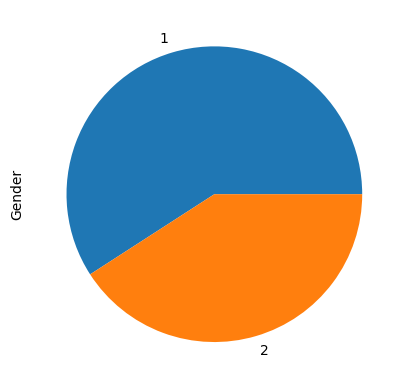

In [ ]:
# Распределение столбца Gender в синтезированных данных синтезатора GaussianCopulaSynthesizer
synthetic_data['Gender'].value_counts().plot(kind='pie')

<Axes: title={'center': 'Count of age'}, xlabel='age', ylabel='count'>

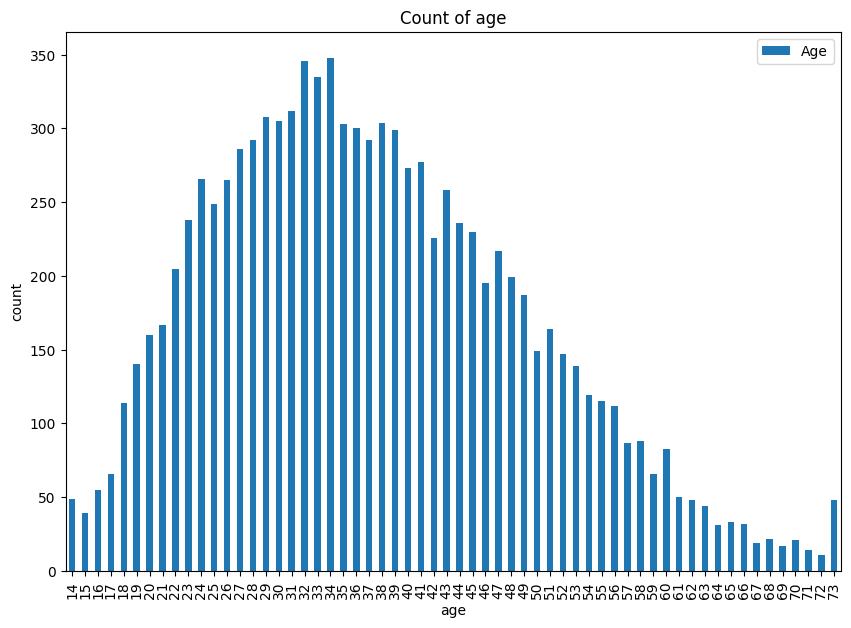

In [ ]:
# Распределение столбца Age в синтезированных данных синтезатора GaussianCopulaSynthesizer
synthetic_data['Age'].value_counts().sort_index().plot(kind='bar',
                                                       title='Count of age',
                                                       xlabel='age',
                                                       ylabel='count',
                                                       legend=True,
                                                       figsize=(10,7))

<Axes: ylabel='Level'>

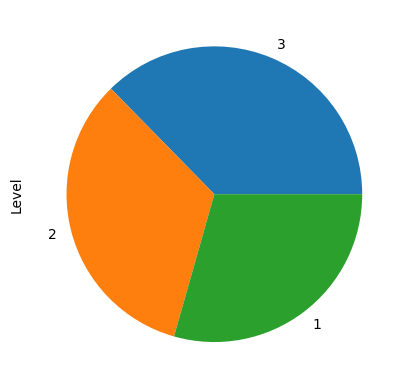

In [ ]:
# Распределение столбца Level в синтезированных данных синтезатора GaussianCopulaSynthesizer
synthetic_data['Level'].value_counts().plot(kind='pie')

<ipython-input-23-8caf1d9c47fe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(synthetic_data.corr(), annot=True, cmap='coolwarm')


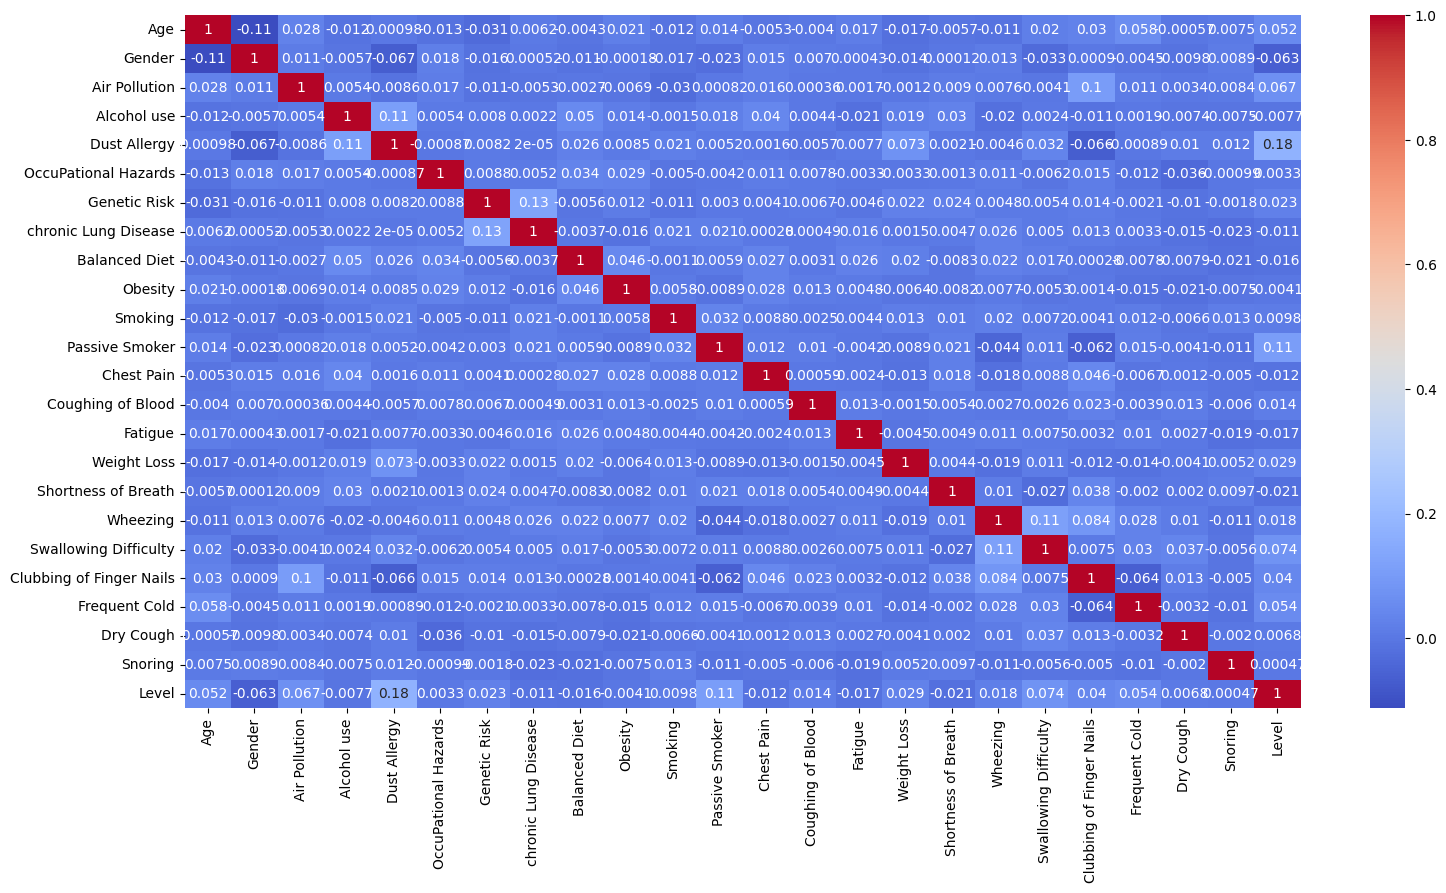

In [ ]:
# Тепловая карта синтезированных даннных синтезатора GaussianCopulaSynthesizer
plt.figure(figsize = (18,9))
sn.heatmap(synthetic_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## ctgan


In [ ]:
# Создание синтезатора
synthesizer = CTGANSynthesizer(metadata, epochs=1500, batch_size=100,
                               verbose=True)
# Обучение синтезатора
synthesizer.fit(data)
# Синтезированние данных на обученном синтезаторе
synthetic_data2 = synthesizer.sample(num_rows=10000)

Gen. (-2.06) | Discrim. (-0.64): 100%|██████████| 1500/1500 [22:49<00:00,  1.09it/s]


In [ ]:
# Вывод синетезированных данных
synthetic_data2

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,sdv-id-0,50,2,6,8,7,3,7,6,7,...,3,6,4,7,2,2,3,1,3,3
1,sdv-id-1,26,1,6,7,7,7,7,6,7,...,2,7,3,1,8,7,2,1,3,3
2,sdv-id-2,29,1,2,4,5,6,2,3,4,...,6,4,2,3,4,7,2,3,3,1
3,sdv-id-3,48,2,4,2,3,2,1,3,2,...,1,1,1,2,1,4,5,2,1,1
4,sdv-id-4,26,1,6,7,7,7,6,7,6,...,8,3,7,7,7,8,2,6,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,sdv-id-9995,54,1,6,7,7,7,7,6,7,...,2,5,6,6,5,9,3,6,4,3
9996,sdv-id-9996,14,1,3,1,4,1,2,3,4,...,2,3,2,3,1,9,2,4,2,1
9997,sdv-id-9997,36,2,2,7,7,7,7,6,7,...,3,2,4,1,8,2,4,2,3,3
9998,sdv-id-9998,16,2,6,8,7,7,7,6,2,...,3,6,4,7,8,7,3,1,3,3


In [ ]:
# Проверка качества данных
quality_report = evaluate_quality(
    real_data=data,
    synthetic_data=synthetic_data2,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 300/300 [00:11<00:00, 26.32it/s]

Overall Score: 86.82%

Properties:
- Column Shapes: 93.33%
- Column Pair Trends: 80.31%


<Axes: ylabel='Gender'>

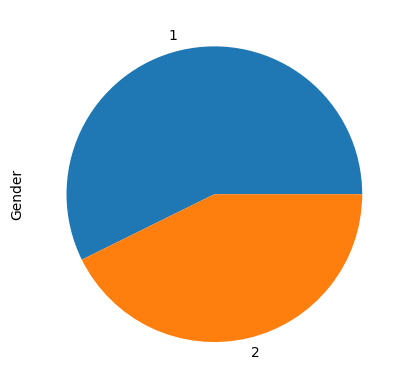

In [ ]:
# Распределение столбца Gender в синтезированных данных синтезатора CTGANSynthesizer
synthetic_data2['Gender'].value_counts().plot(kind='pie')

<ipython-input-28-bce38202eb7a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(synthetic_data2.corr(), annot=True, cmap='coolwarm')


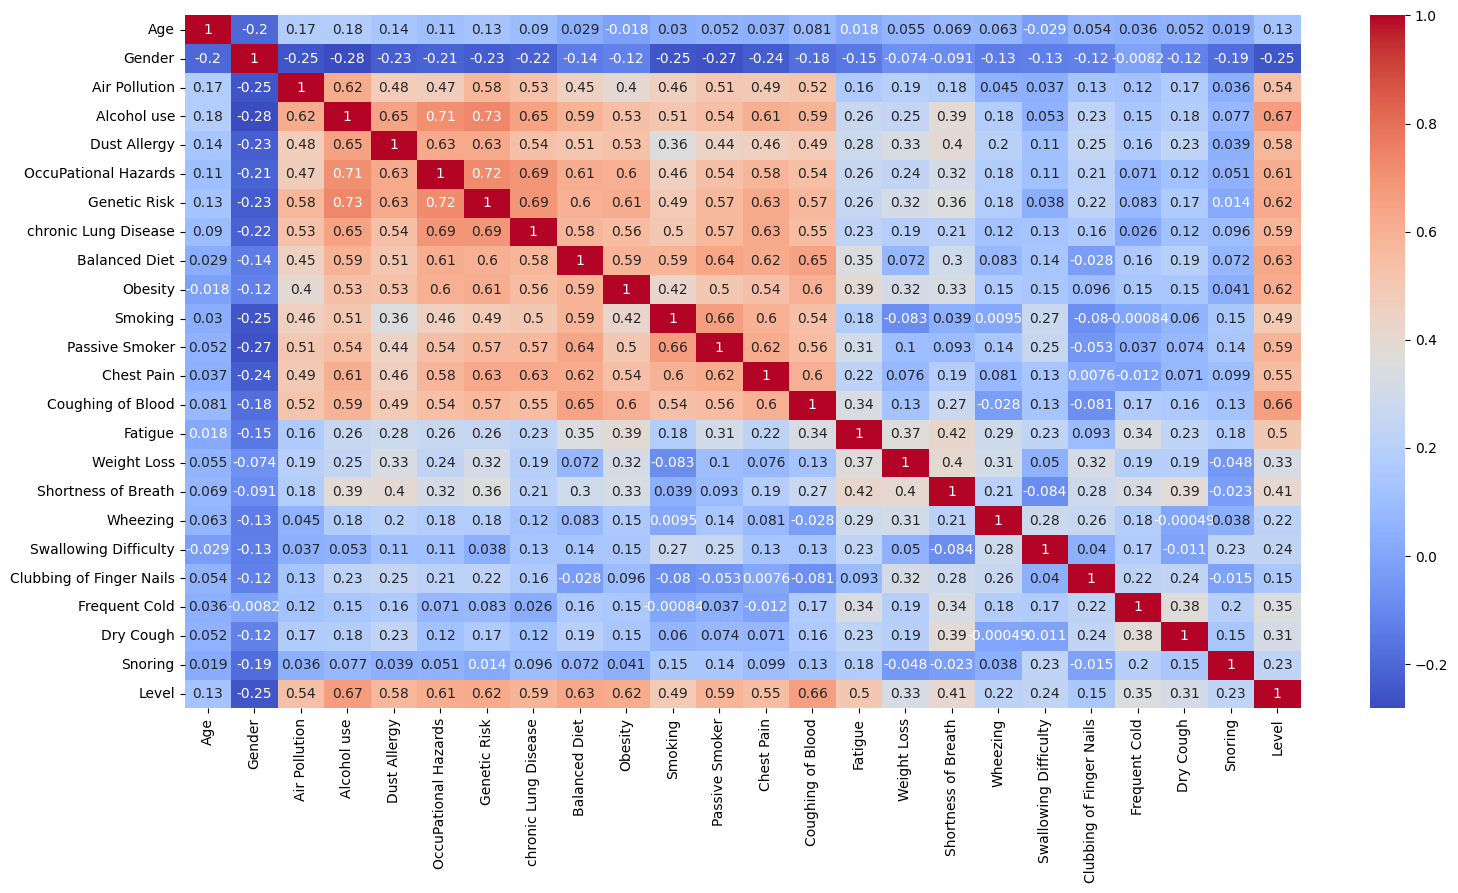

In [ ]:
# Тепловая карта синтезированных даннных синтезатора CTGANSynthesizer
plt.figure(figsize = (18,9))
sn.heatmap(synthetic_data2.corr(), annot=True, cmap='coolwarm')
plt.show()

##TVAES Synthesizer

In [ ]:
# Создание синтезатора
synthesizer2 = TVAESynthesizer(metadata,
    epochs=500,
    batch_size=200)
# Обучение синтезатора
synthesizer2.fit(data)
# Синтезированние данных на обученном синтезаторе
synthetic_data3 = synthesizer2.sample(num_rows=10000)

In [ ]:
# Проверка качества данных
quality_report = evaluate_quality(
    real_data=data,
    synthetic_data=synthetic_data3,
    metadata=metadata)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 300/300 [00:11<00:00, 25.01it/s]

Overall Score: 91.45%

Properties:
- Column Shapes: 96.18%
- Column Pair Trends: 86.71%


<Axes: title={'center': 'Count of age'}, xlabel='age', ylabel='count'>

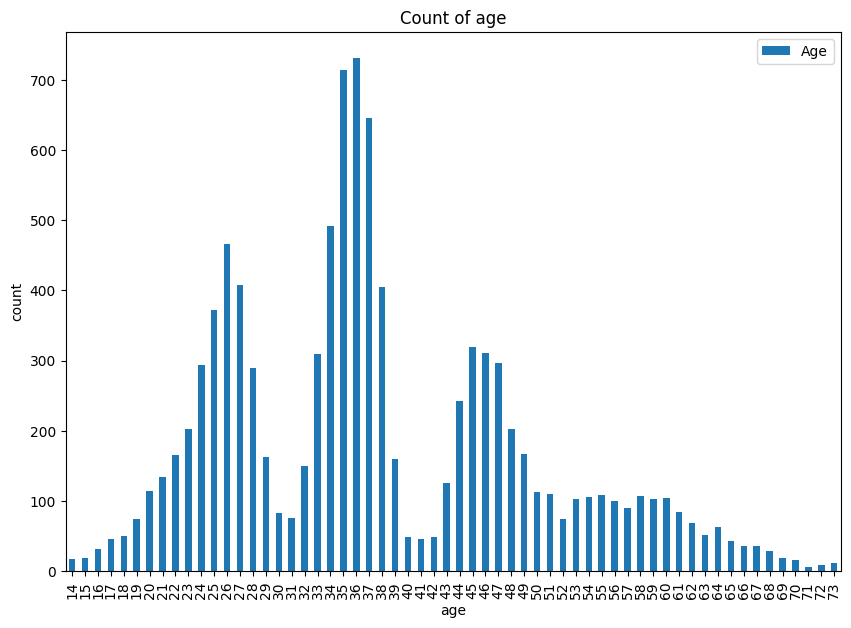

In [ ]:
# Распределение столбца Age в синтезированных данных синтезатора TVAESynthesizer
synthetic_data3['Age'].value_counts().sort_index().plot(kind='bar',
                                                       title='Count of age',
                                                       xlabel='age',
                                                       ylabel='count',
                                                       legend=True,
                                                       figsize=(10,7))

<Axes: ylabel='Level'>

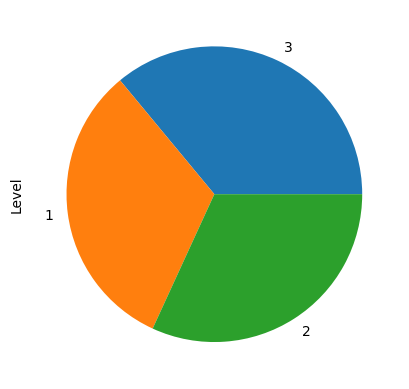

In [ ]:
# Распределение столбца Level в синтезированных данных синтезатора TVAESynthesizer
synthetic_data3['Level'].value_counts().plot(kind='pie')

<Axes: ylabel='Gender'>

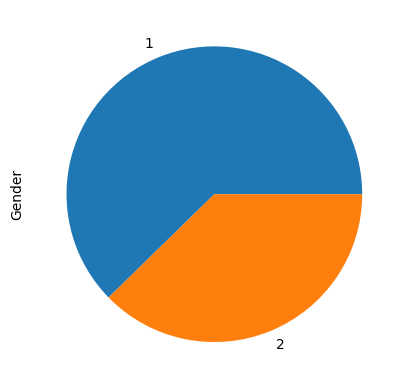

In [ ]:
# Распределение столбца Gender в синтезированных данных синтезатора TVAESynthesizer
synthetic_data3['Gender'].value_counts().plot(kind='pie')

<ipython-input-49-c606d5137d39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(synthetic_data3.corr(), annot=True, cmap='coolwarm')


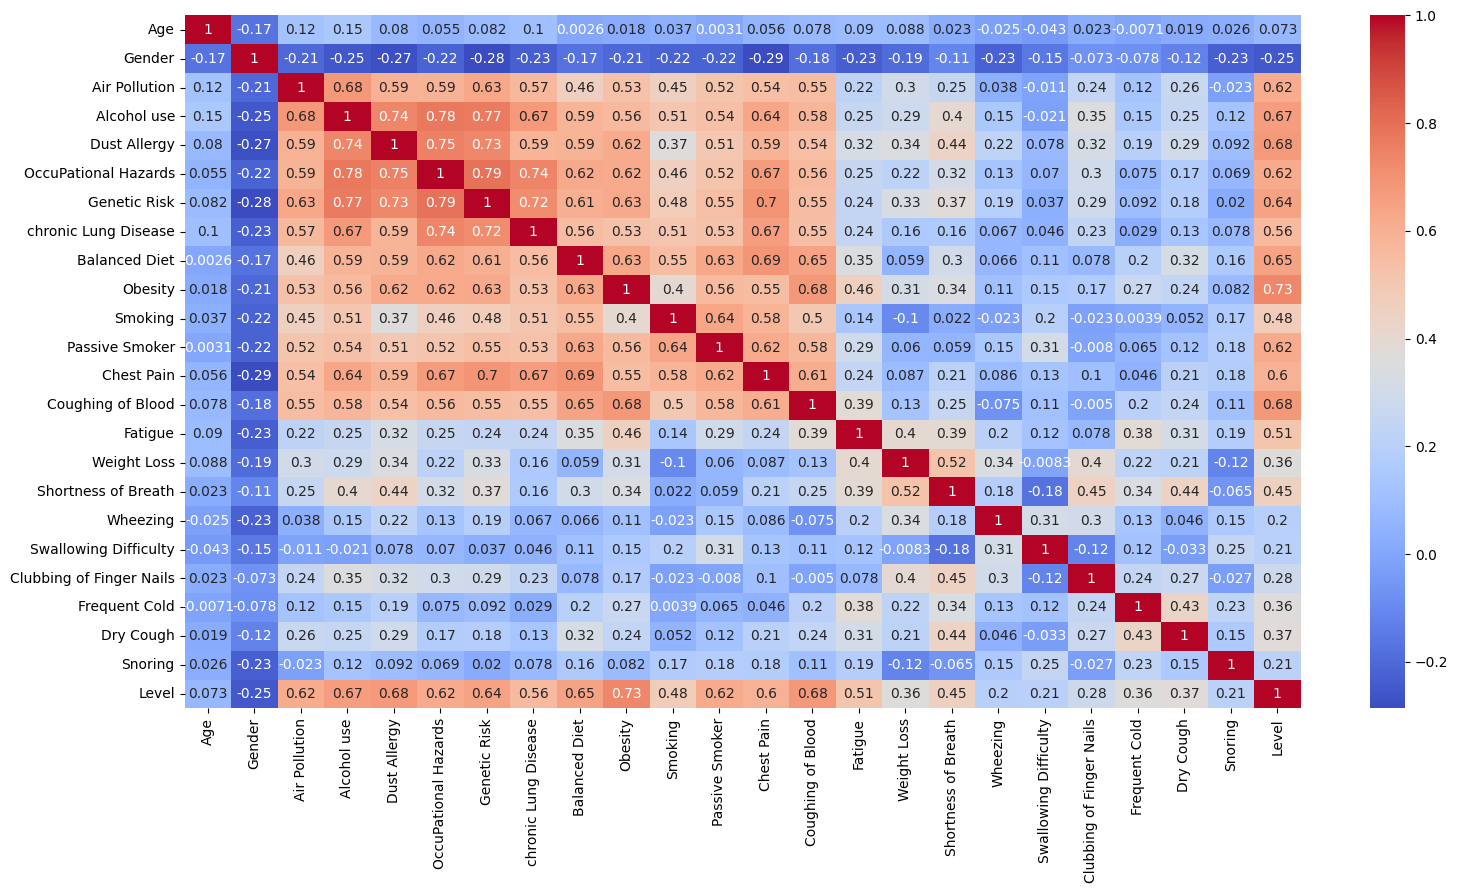

In [ ]:
# Тепловая карта синтезированных даннных синтезатора TVAESynthesizer
plt.figure(figsize = (18,9))
sn.heatmap(synthetic_data3.corr(), annot=True, cmap='coolwarm')
plt.show()

# Обучение на синтезированных данных

In [ ]:
# Разделение синтезированных данных на обучающую выборку и правильнве ответы для неё
# Правильные ответы:
ytrain=synthetic_data3['Level']
# Обучающая выборка:
xtrain=synthetic_data3[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']]

In [ ]:
# Разделение оригинального датаста на входные данные для тестированния и правильные для них ответы
# Правильные ответы:
ytest= data['Level']
# Входные данные:
xtest = data[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']]

### Логистическая регрессия

In [ ]:
parameters_lg = {'solver' : ['lbfgs', 'newton-cg', 'sag', 'saga']}
log_reg = LogisticRegression()
# Создание модели GridSearchCV
clas_lg = GridSearchCV(log_reg, parameters_lg)
# Обучение модели GridSearchCV
clas_lg.fit(xtrain, ytrain)
# Проверка точности
y_predGridSearchCV_lg = clas_lg.predict(xtest)
accuracy_lg = accuracy_score(y_predGridSearchCV_lg, ytest)
accuracy_2lg = accuracy_score(y_predGridSearchCV_lg, ytest)
# Вывод наиболее подходящих параметров
clas_lg.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'solver': 'newton-cg'}

In [ ]:
# Создание класификатора
log_reg = LogisticRegression(solver='newton-cg')
# Обучение класификатора
log_reg.fit(xtrain,ytrain)
# Тестирование класификатора
y_pred_lg = log_reg.predict(xtest)
# Провеерки точности класификатора
accuracy_log_reg = accuracy_score(y_pred_lg , ytest)
print('Точность модели GaussianNB =',accuracy_log_reg)
print('Матрица ошибок для модели GaussianNB:', confusion_matrix(ytest, y_pred_lg ), sep='\n')
print('Мера F1_score для модели GaussianNB:', f1_score(ytest, y_pred_lg , average='weighted'))

Точность модели GaussianNB = 0.966
Матрица ошибок для модели GaussianNB:
[[283  20   0]
 [  0 318  14]
 [  0   0 365]]
Мера F1_score для модели GaussianNB: 0.96594266230775


### Дерево решений

In [ ]:
parameters_DecisionTreeClassifier = {'criterion': ['gini', 'entropy', 'log_loss'],
               'splitter' : ['best', 'random']}
clas2 = DecisionTreeClassifier()
# Создание модели GridSearchCV
clas2GCV = GridSearchCV(clas2, parameters_DecisionTreeClassifier)
# Обучение модели GridSearchCV
clas2GCV.fit(xtrain, ytrain)
# Проверка точности
y_predGridSearchCV_DTC = clas2GCV.predict(xtest)
accuracy_2GSV = accuracy_score(y_predGridSearchCV_DTC, ytest)
# Вывод наиболее подходящих параметров
clas2GCV.best_params_

{'criterion': 'log_loss', 'splitter': 'random'}

In [ ]:
# Создание класификатора
clas2 = DecisionTreeClassifier(criterion='log_loss', splitter='random')
# Обучение класификатора
clas2.fit(xtrain, ytrain)
# Тестирование класификатора
y_pred_DecisionTreeClassifier = clas2.predict(xtest)
# Провеерки точности класификатора
accuracy_DecisionTreeClassifier = accuracy_score(y_pred_DecisionTreeClassifier, ytest)
print('Точность модели Дерево решений =', accuracy_DecisionTreeClassifier)
print('Матрица ошибок для модели дерево решений:',confusion_matrix(ytest, y_pred_DecisionTreeClassifier), sep='\n')
print('Мера F1_score для модели Дерево решений:', f1_score(ytest, y_pred_DecisionTreeClassifier, average='weighted'))

Точность модели Дерево решений = 1.0
Матрица ошибок для модели дерево решений:
[[303   0   0]
 [  0 332   0]
 [  0   0 365]]
Мера F1_score для модели Дерево решений: 1.0


### GaussianNB

In [ ]:
# Создание класификатора
clas_GNB = GaussianNB()
# Обучение класификатора
clas_GNB.fit(xtrain, ytrain)
# Тестирование класификатора
y_pred_GaussianNB = clas_GNB.predict(xtest)
# Провеерки точности класификатора
accuracy_GaussianNB = accuracy_score(y_pred_GaussianNB, ytest)
print('Точность модели GaussianNB =',accuracy_GaussianNB)
print('Матрица ошибок для модели GaussianNB:', confusion_matrix(ytest, y_pred_GaussianNB), sep='\n')
print('Мера F1_score для модели GaussianNB:', f1_score(ytest, y_pred_GaussianNB, average='weighted'))

Точность модели GaussianNB = 0.839
Матрица ошибок для модели GaussianNB:
[[273  20  10]
 [ 51 221  60]
 [  0  20 345]]
Мера F1_score для модели GaussianNB: 0.8342014457097


### RandomForestClassifier

In [ ]:
parameters_RFC = { 'n_estimators':[10, 50, 100, 150],'criterion': ['gini', 'entropy', 'log_loss']}
classifier_RF = RandomForestClassifier()
# Создание модели GridSearchCV
clf_RFC = GridSearchCV(classifier_RF, parameters_RFC)
# Обучение модели GridSearchCV
clf_RFC.fit(xtrain, ytrain)
# Проверка точности
y_predGridSearchCV_RFC = clf_RFC.predict(xtest)
accuracy_GridSearchCV_RFC = accuracy_score(y_predGridSearchCV_RFC, ytest)
# Вывод наиболее подходящих параметров
clf_RFC.best_params_



{'criterion': 'entropy', 'n_estimators': 100}

In [ ]:
# Создание класификатора
classifier_RF = RandomForestClassifier(criterion='entropy', n_estimators=100)
clas_GNB = GaussianNB()
# Обучение класификатора
classifier_RF.fit(xtrain, ytrain)
# Провеерки точности класификатора
y_pred_RandomForestClassifier = classifier_RF.predict(xtest)
accuracy_RandomForestClassifier = accuracy_score(y_pred_RandomForestClassifier, ytest)
print('Точность модели Случайный лес =',accuracy_RandomForestClassifier)
print('Матрица ошибок для модели Случайный лес:', confusion_matrix(ytest, y_pred_RandomForestClassifier), sep='\n')
print('Мера F1_score для модели Случайный лес:', f1_score(ytest, y_pred_RandomForestClassifier, average='weighted'))


Точность модели Случайный лес = 1.0
Матрица ошибок для модели Случайный лес:
[[303   0   0]
 [  0 332   0]
 [  0   0 365]]
Мера F1_score для модели Случайный лес: 1.0


### KNeighborsClassifier

In [ ]:
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'metric' :['minkowski','manhattan']}
clas = KNeighborsClassifier()
# Создание модели GridSearchCV
clf = GridSearchCV(clas, parameters)
# Обучение модели GridSearchCV
clf.fit(xtrain, ytrain)
# Проверка точности
y_predGridSearchCV = clf.predict(xtest)
accuracy_GridSearchCV = accuracy_score(y_predGridSearchCV, ytest)
# Вывод наиболее подходящих параметров
clf.best_params_

{'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 5}

In [ ]:
# Создание класификатора
clas = KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=5)
# Обучение класификатора
clas.fit(xtrain, ytrain)
# Провеерки точности класификатора
y_pred_KNeighborsClassifier = clas.predict(xtest)
accuracy_KNeighborsClassifier = accuracy_score(y_pred_KNeighborsClassifier, ytest)
print('Точность модели KNeighbors =',accuracy_KNeighborsClassifier)
print('Матрица ошибок для модели KNeighbors:', confusion_matrix(ytest, y_pred_KNeighborsClassifier), sep='\n')
print('Мера F1_score для модели KNeighbors:', f1_score(ytest, y_pred_KNeighborsClassifier, average='weighted'))



Точность модели KNeighbors = 1.0
Матрица ошибок для модели KNeighbors:
[[303   0   0]
 [  0 332   0]
 [  0   0 365]]
Мера F1_score для модели KNeighbors: 1.0


### MLPClassifier

In [94]:
 parameters_MLPClassifier = {'activation':['identity', 'logistic', 'tanh', 'relu'],
              			'max_iter':[500, 400, 300, 200, 100, 50]}
ClassifierMLP = MLPClassifier()
# Создание модели GridSearchCV
clf_MLP = GridSearchCV(ClassifierMLP, parameters_MLPClassifier)
# Обучение модели GridSearchCV
clf_MLP.fit(xtrain, ytrain)
# Проверка точности
y_predGridSearchCV_MLP = clf_MLP.predict(xtest)
accuracy_MLP = accuracy_score(y_predGridSearchCV_MLP, ytest)
# Вывод наиболее подходящих параметров
clf_MLP.best_params_


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

{'activation': 'identity', 'max_iter': 50}

In [92]:
# Создание класификатора
ClassifierMLP = MLPClassifier(solver='adam', activation='identity', max_iter=50, hidden_layer_sizes=(50,))
# Обучение класификатора
ClassifierMLP.fit(xtrain, ytrain)
# Провеерки точности класификатора
y_pred_MLPClassifier = ClassifierMLP.predict(xtest)
accuracy_MLPClassifier = accuracy_score(y_pred_MLPClassifier, ytest)
print('Точность для модели MLP =',accuracy_MLPClassifier)
print('Матрица ошибок для модели MLP:', confusion_matrix(ytest, y_pred_MLPClassifier), sep='\n')
print('Мера F1_score для модели MLP:', f1_score(ytest, y_pred_MLPClassifier, average='weighted'))


Точность для модели MLP = 0.96
Матрица ошибок для модели MLP:
[[292  11   0]
 [  0 303  29]
 [  0   0 365]]
Мера F1_score для модели MLP: 0.9598950622312582


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


### Сравнение моделей

<Axes: ylabel='%'>

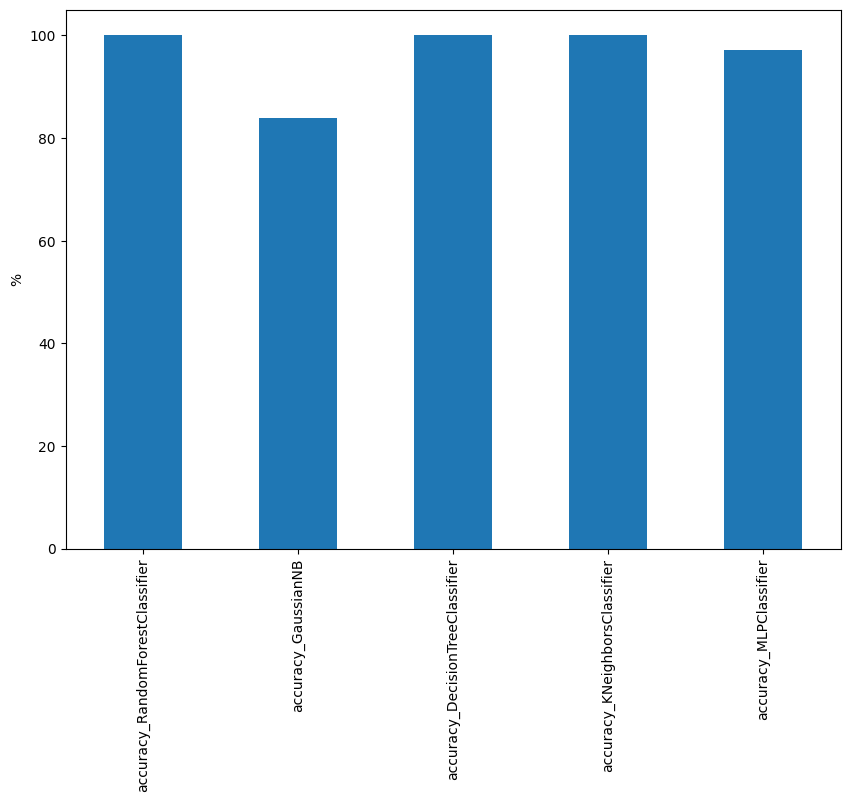

In [90]:
data6 = [ accuracy_RandomForestClassifier*100, accuracy_GaussianNB*100,accuracy_DecisionTreeClassifier*100, accuracy_KNeighborsClassifier*100, accuracy_MLPClassifier*100]
index6 = [ 'accuracy_RandomForestClassifier','accuracy_GaussianNB',
        'accuracy_DecisionTreeClassifier', 'accuracy_KNeighborsClassifier', 'accuracy_MLPClassifier']
s6 = pd.Series(data6, index=index6)
s6.plot(kind='bar',ylabel='%', figsize=(10,7))